### 1. 미분

 기울기란 x의 증가량에 따른 y의 증가량의 나타나는 지표이다.  
 x의 증가량을 아주 작은 단위로 변경한다면 두점의 거리는 0에 가까워져 한점이라고 표현이 가능할 것이다.  
 그럼 한점, 한순간에 대한 기울기를 구할수 있다. 이걸 미분이라고 한다.  
 수식은 아래 "수식1"를 참고하면 된다.    
   
   
 <b>수식1</b>
 <img src="../image/1-1_1_img.png">
 
 참조 - https://m.blog.naver.com/ssdyka/221299637545

#### 변수가 1개일때

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
""" 수식1 구현 """
# 기울기(변화도) 파악
def differential(f, x):
    h = 1e-4
    return (f(x+h)-f(x))/h

## y = x^2
def function(x):
    return math.pow(x,2)


2차 함수의 경우 아래로 볼록한 형태를 가지게되고 기울기가 0이 되는 시점을 가지고 있다.

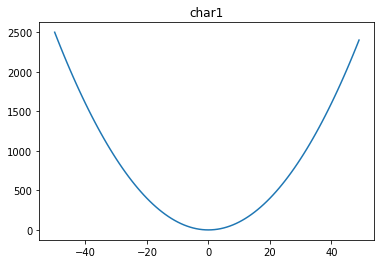

 x값이 0일때 미분값: 9.999999999999999e-05
 x값이 20일때 미분값: 40.00009999970189
 x값이 -20일때 미분값: -39.999900000111666


In [3]:
plt.plot([i for i in range(-50,50)], [function(i) for i in range(-50,50)])
plt.title('char1')
plt.show()

h = 1e-4
print(f' x값이 0일때 미분값: {differential(function, 0)}\n x값이 20일때 미분값: {differential(function, 20)}\n x값이 -20일때 미분값: {differential(function, -20)}')


#### 변수가 1개 이상일때 (편미분)
 변수가 1개 이상일때는 대상 변수를 제외하고 나머지 변수는 상수 취급한다.  
 각 변수별로 별도의 gradient를 각각 구하게 되면(미분) 특정 변수지점에서 미분의 크기가 가장 적은 방향으로 가는 vecter가 생성된다. (아래 quiver 차트 참조)  

In [4]:
""" gradient """

### 타겟(idx)를 미분한다.
def differential_2(f, x, h, idx):
    t = x.copy()
    t[idx] += h
    return (f(t)-f(x))/h

### 변수별 미분값을 구한다.
def gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(len(x)):
        grad[idx] = differential_2(f, x, h, idx)
        
    return grad

""" 수식정의 """

### y = 3x^2
def function_1(x):
    return math.pow(3*x,2)

### y = 2x^2
def function_2(x):
    return math.pow(2*x,2)

### y = 3x^2+2x^2
def function_3(x):
    return function_1(x[0])+function_2(x[1])


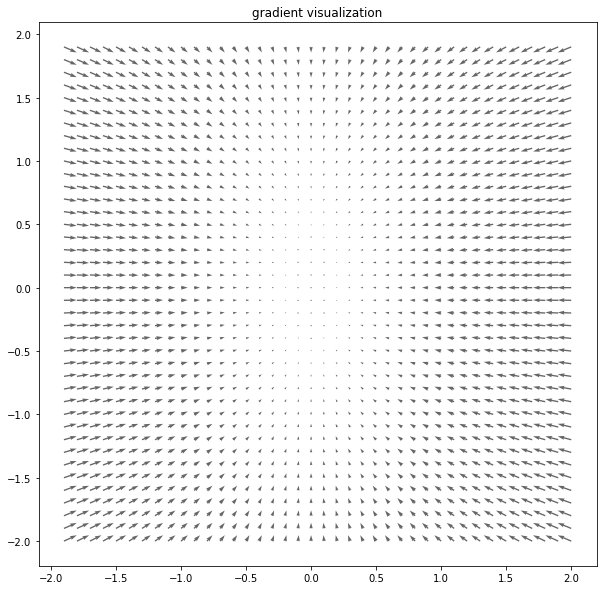

In [5]:
""" 시각화를 위한 값 추출 """
x1, x2, x1_g, x2_g = [], [], [],[]
s_t, e_t, m = -2, 2, 0.1
ep = int((e_t-s_t)/m)
for i in range(ep):
    s_t += m
    for z in range(ep):
        e_t -= m
        g = gradient(function_3, [s_t, e_t])
        
        x1_g.append(g[0])
        x2_g.append(g[1])
        x1.append(s_t)
        x2.append(e_t)
    e_t = 2

""" 데이터 시각화"""

plt.figure(figsize=(10,10))
plt.quiver(x1, x2, np.array(x1_g) * -1, np.array(x2_g) * -1,  angles="xy",color="#666666")
plt.title('gradient visualization')
plt.show()


우리는 각 변수들이 기울기가 0인 상태로 상태값을 이동해야한다.(나중에 y값이 loss)  
char1를 살펴보면 기울기가 양수의 경우 y값이 가장낮은 상태로 이동하기 위해서는 x값이 - 방향으로 이동해야한다.  
반대로 기울기가 음수인 경우 y이 가장 낮은 상태로 이동하기 위해서는 x값이 + 방향으로 이동해야한다.  

In [6]:
""" 
    x_1의 기울기를 살펴보면 양수이기 때문에 x1에 값을 - 방향으로 이동해야하는걸 알 수 있다.
    반대로 x2의 기울기는 음수인것으로 보아 x2의 값을 양수의 방향으로 이동시켜야한다.
"""
print(x1[0], x2[0], x1_g[0], x2_g[0])

"""
    이동후 해당 기울기가 감소된걸 확인할 수 있다.
"""
new_x1, new_x2 = x1[0]-(x1_g[0]*0.01), x2[0]-(x2_g[0]*0.01)
new_g = gradient(function_3, [new_x1, new_x2])

pd.DataFrame(
    [[x1[0], x2[0], x1_g[0], x2_g[0]],[new_x1, new_x2, new_g[0], new_g[1]]],
    columns = ['x1', 'x2', 'x1_diff', 'x2_diff']
)


-1.9 1.9 -34.19909999998083 15.200400000026093


,x1,x2,x1_diff,x2_diff
0,-1.900000,1.900000,-34.199100,15.200400
1,-1.558009,1.747996,-28.043262,13.984368


### 2. gradient descent algorithm

 위 내용에서 우리는 특정 시점에서 가장 낮은 기울기로 가는 방법을 파악했다.  
 그럼 실제 gradient descent algorithm을 통해 최적 지점을 찾아가는 코드를 작성해보자

In [7]:
""" 수식 정의 """
### y = 3.2x^2 + 2x + 4
def function1(x):
    return math.pow(3.2*x, 2) + 2*x +4

### y = 1.2x^2 + 5x + 19
def function2(x):
    return math.pow(-1.2*x, 2) + 5*x + 19

### y = function1+function2
def function(x):
    return function1(x[0])+function2(x[1])

### differential
def differential(x, idx):
    h = 1e-6
    t = x.copy()
    t[idx] += h
    return (function(t) - function(x))/h

### gradient_descent
def gradient_descent(x, rete):
    grd = np.zeros_like(x)
    for i in range(len(x)):
        grd[i] = differential(x, i)
    m_grd = grd * rete
    return np.array(x) - m_grd, grd   


In [8]:
""" 학습하기 epoch 100 """
epoch = 100
x1, x2 = -20, 15
step_log, grd_log = [], []
for i in range(epoch):
    step_log.append([x1, x2])
    (x1, x2), grd = gradient_descent([x1, x2], 0.03)
    grd_log.append(grd.tolist())
    

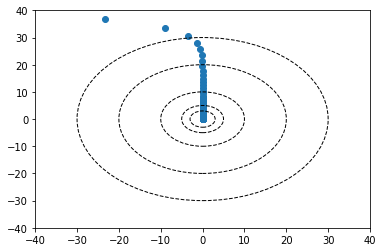

In [9]:
""" 학습 내용 시각화 """
step_log = np.array(grd_log)
final_log = step_log[-1]
move_size = (step_log[0]-step_log[-1])+1
move_size = [40,40]

### circle 그리기
figure, axes = plt.subplots()
for p in [3,5,10, 20, 30]:
    draw_circle = plt.Circle((0, 0),p , fill=False, ls = '--')
    axes.add_artist(draw_circle)

plt.xlim(-move_size[0], move_size[0])
plt.ylim(-move_size[1], move_size[1])

### 학습 시각화 (scatter)
plt.scatter(np.array(step_log)[:,0], np.array(step_log)[:,1])
plt.show()


학습율이 너무 커 버리면 최적화가 옳바르게 되지 않는다. 최적점 이상으로 이동해버림  
너무 커버리면 아에 팅겨져나간다. ex) 0.1  

In [10]:
epoch = 100
x1, x2 = 15000, -200
step_log, grd_log = [], []
for i in range(epoch):
    step_log.append([x1, x2])
    (x1, x2), grd = gradient_descent([x1, x2], 0.092)
    grd_log.append(grd.tolist())
    

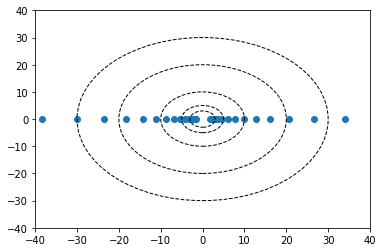

In [11]:
step_log = np.array(grd_log)
final_log = step_log[-1]
move_size = (step_log[0]-step_log[-1])+1
move_size = [40,40]

figure, axes = plt.subplots()
for p in [3,5,10, 20, 30]:
    draw_circle = plt.Circle((0, 0),p , fill=False, ls = '--')
    axes.add_artist(draw_circle)

plt.xlim(-move_size[0], move_size[0])
plt.ylim(-move_size[1], move_size[1])
plt.scatter(np.array(step_log)[:,0], np.array(step_log)[:,1])
plt.show()

### 3. 행렬과 loss 최적화

#### 3_1 - 각 w 별 미분 진행
   
 <b>수식2</b>
 <img src="../image/1-1_2_img.png">

In [12]:
""" loss function - 실제값과 예측값의 제곱"""
def loss_function(y, y_prob):
    loss = y - y_prob
    return np.power(loss,2).sum()

""" forward """
def forward(x, w):
    return x.dot(w)

""" gradient"""
def gradient(x, y, w):
    grd_np = np.zeros_like(w)
    h = 1e-5

    for i in range(grd_np.shape[0]):
        for z in range(grd_np.shape[1]):
            m_w = w.copy()
            m_w[i, z] += h
            grd_np[i, z] = (loss_function(y, forward(x,m_w)) - loss_function(y, forward(x,w))) / h
    return grd_np



epoch: 0,loss:4035.0153313426895
epoch: 1,loss:669.7909560644794
epoch: 2,loss:111.18521642100012
epoch: 3,loss:18.45815961770012
epoch: 4,loss:3.0648715446456896
epoch: 5,loss:0.5091424323690168
epoch: 6,loss:0.08467756097614543
epoch: 7,loss:0.014123753813902379
epoch: 8,loss:0.002373163382111394
epoch: 9,loss:0.00040666315615885644
epoch: 10,loss:7.37200092823274e-05
epoch: 11,loss:1.579735483600547e-05
epoch: 12,loss:5.100168867115173e-06
epoch: 13,loss:2.8834818486872857e-06
epoch: 14,loss:2.3358391115999545e-06
epoch: 15,loss:2.1717249897713177e-06
epoch: 16,loss:2.114656162558992e-06
epoch: 17,loss:2.093030988398476e-06
epoch: 18,loss:2.0844903294101106e-06
epoch: 19,loss:2.081055490055883e-06
epoch: 20,loss:2.079663503570821e-06
epoch: 21,loss:2.079097614642223e-06
epoch: 22,loss:2.078867265097891e-06
epoch: 23,loss:2.0787734500476815e-06
epoch: 24,loss:2.0787352335595516e-06
epoch: 25,loss:2.07871966437323e-06
epoch: 26,loss:2.0787133213039205e-06
epoch: 27,loss:2.078710737061

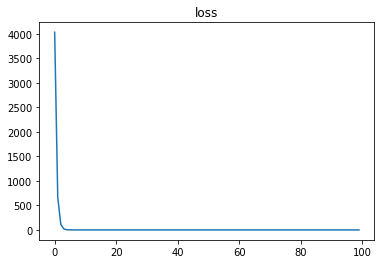

예측값: [[69.99916759 51.99916759 31.99916759]]
실제값: [[70 52 32]]


In [13]:
""" 변수 정의 """
x = np.array([[170, 27]])
y = np.array([[70, 52, 32]])
w = np.random.randn(2,3)

""" step """
epoch = 100
loss_log = []
for e in range(epoch):
    rate = 1e-5
    
    ### step
    grd_np = gradient(x, y, w)
    w -= grd_np*rate
    
    ### loss
    loss = loss_function(y, forward(x,w))
    loss_log.append(loss)
    print(f'epoch: {e},loss:{loss}')
    
plt.plot(loss_log)
plt.title('loss')
plt.show()
print('예측값:', forward(x,w))
print('실제값:', y)
     

#### 3_2 - 행렬을 연산을 통해 미분 진행   
  
 x- 스칼라 W- 행렬  
 
 $$ \hat y = xW \ (1)$$
   
 $$ loss = y - \hat y \ (2)$$
   
 $$ {\partial \ loss  \over \partial \ W} = {\partial \ (y - \hat y) \over \partial \ W} \ (3)$$
   
 $$ {\partial \ loss  \over \partial \ W} = {\partial \ (y - \hat y) \over \partial \ W} \ (4)$$
  
 $$ {\partial \ loss  \over \partial \ W} = {\partial \ (y - xW) \over \partial \ W} \ (5)$$
   
 <br><center>======================== 베이스수식 ======================== </center>
   
<center>1차 함수의 미분</center>
   
 $$ {\partial \ aW \over \partial \ W}  = a^T $$

 <br><center>======================== 아래 적용 ========================</center>
   
 $$ {\partial \ loss  \over \partial \ W} = {\partial \ (y - xW) \over \partial \ W} \ (6)$$
   
 $$ {\partial \ loss  \over \partial \ W} = -x^T \ (7)$$
 
 <br><center>======================== gradient descent ========================</center>
 
 $$ w -= -x^T*loss * \eta \ (7) \\
 \eta - step \ rate $$

epoch: 0,loss:[[-157.65334637  -43.87305833  -45.66667979]]
epoch: 1,loss:[[-110.94223638  -30.87390988  -32.13609924]]
epoch: 2,loss:[[-78.07116116 -21.72627912 -22.61449439]]
epoch: 3,loss:[[-54.93945682 -15.28899988 -15.91404585]]
epoch: 4,loss:[[-38.66144516 -10.7590221  -11.1988732 ]]
epoch: 5,loss:[[-27.20644557  -7.57123145  -7.88075906]]
epoch: 6,loss:[[-19.14544781  -5.32795128  -5.54576896]]
epoch: 7,loss:[[-13.47284308  -3.7493326   -3.90261307]]
epoch: 8,loss:[[-9.4809744  -2.63844284 -2.74630785]]
epoch: 9,loss:[[-6.6718565  -1.85669861 -1.9326043 ]]
epoch: 10,loss:[[-4.69505214 -1.30657738 -1.35999297]]
epoch: 11,loss:[[-3.30395514 -0.91945157 -0.95704065]]
epoch: 12,loss:[[-2.32502627 -0.64702726 -0.67347908]]
epoch: 13,loss:[[-1.63614424 -0.45531956 -0.47393396]]
epoch: 14,loss:[[-1.15137106 -0.32041292 -0.33351207]]
epoch: 15,loss:[[-0.81023133 -0.22547778 -0.23469578]]
epoch: 16,loss:[[-0.57016789 -0.15867097 -0.16515777]]
epoch: 17,loss:[[-0.40123285 -0.11165835 -0.1

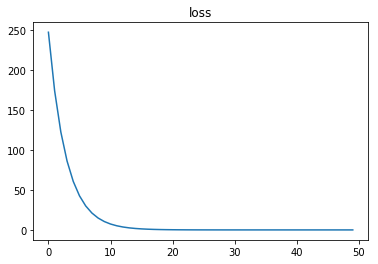

예측값: [[70.00000369 52.00000103 32.00000107]]
실제값: [[70 52 32]]


In [14]:
""" 변수 정의 """
x = np.array([[170, 27]])
y = np.array([[70, 52, 32]])
w = np.random.randn(2,3)
loss_log = []
epoch = 50
for e in range(epoch):
    y_hat = x.dot(w)
    loss = y - y_hat
    w += (x.T.dot(loss)*1e-5)

    loss_log.append(abs(loss.sum()))
    print(f'epoch: {e},loss:{loss}')
    
plt.plot(loss_log)
plt.title('loss')
plt.show()
print('예측값:', forward(x,w))
print('실제값:', y)
